# **Graded Challenge 1**
Name : `Kamil Riyadi Alam Situmeang`\
Batch : `FTDS009`\
This project is intended as fulfillment for an assignment of Hacktiv8 Fulltime Data Scientiest Bootcamp program.

## I. Introduction

### I.1 Project Background
My Name is Kamil Riyadi Alam Situmeang, I am a `junior data analyst currently working for Team Rocket` under the research team.

Team Rocket itself is an Organization based in Kanto and Johto regions. `Team Rocket main focus is capturing rare and strong Pokemon.`

`"Giovanni"`, Team Rocket Boss is currently `aim to capture "Mewtwo"`, most strongest Pokemon in Kanto region.

He asks the research team to investigate more about "Mewtwo", and ask us to prepare a Pokemon team consist of 6 Pokemon to battle and capture "Mewtwo".

### I.2 Dataset Source and Description
`Dataset` for this project is publicly made available and maintained `by Alberto Barradas` through his [Kaggle page](https://www.kaggle.com/abcsds/pokemon).

This dataset has `CC0:Public Domain License`, means everyone has the rights to copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is:

- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round
- Generation : determines which generation (in pokemon video game) is the pokemon from
- Legendary : determines wether a pokemon is legendary pokemon or not

### I.3 Objective
Based on the Project Background, the objectives are:
- Investigate about `Mewtwo`
- Make a recommendation of Pokemon team consist of 6 of Pokemon to battle and capture Mewtwo

## II. Importing Library

Raw dataset for this project is saved in .csv format. In order to work with the dataset more easily, I choose to use pandas and numpy.\
pandas will be used for working with tabular data while numpy will be used for working with array of data.

In [1]:
# Importing libraries into jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Checking libraries version
print(pd.__version__)
print(np.__version__)

# Set to shows all columns in dataframe
pd.set_option('display.max.columns', None)

1.4.1
1.22.2


## III. Data Loading

First, after downloading the dataset and put it in the same folder as this notebook is. I am importing the `.csv` file into jupyter notebook.

In [2]:
# Importing Pokemon.csv into jupyter notebook and save it inside df variable
raw_df = pd.read_csv('Pokemon.csv')

Before continue to the next step, I would like see overview of the dataset

In [3]:
# Quick info about the dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


As from the result above, We can see that `this dataset consits of 800 entries and 13 columns`.

Most `data type` in the entries is `integer`, some of them are is `object`, and there is one column that has `boolean` type.

`Most columns has 800 Non-Null Count`, same number with total entries in the dataset. `This means all entries in columns has values.`

`'Type 2' column` has less Non-Null Count than 800, means this column `has empty value` in some of its entries.

I would like to know the spread of the data inside the dataset, So I use .describe() method in pandas to get statistical descriptive of my dataset.

In [4]:
#Statistical Descriptive of the dataset
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


## IV. Data Cleaning
In this phase, any missing values, error, or outlier inside the dataset will be taken care of. This phase aims to get clean data for analysis.        

Prior to start any data cleaning process, I decided to take a look a subset from the dataset to give a preview on how's the table is look like

In [5]:
# first 10 entries for overview purpose
raw_df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### IV.1 Standard Missing Values
`Standard missing values` means cell in column(s) with no entry, usually is `identified by NaN or NA` in the cell.

This process aims to `identify standard missing values` in the dataset.

In [6]:
# This process will count and `summarize all missing values` inside each column(s)
raw_df.isnull().sum()


#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

from result above, I can pretty much say that each column has no Nan value except `"Type 2"` column.

This result is inline with the result on data loading section.

### IV.2 Non-Standard Missing Values
Sometimes missing values also takes in other form such as ['na', 'N/A', '-', '', etc.], is usually identified as `Non-standard missing values`.

This process aims to `identify Non-Standard Missing Values` in the dataset.

In order to identify any Non-standard missing values, I will utilize pandas `.value_count()` method. This method will list all unique entries and its frequency in each column.

In this process also I will identify any possible `Unexpected Missing Values`, means :
- any entry that has different data type as other entry in the same column,
- any entry that did not match the column description,
- any entry that is should be unique (such as "ID number" or "Name") but has frequency > 1 

will considered as missing value.

In [7]:
# #: ID for each pokemon
x = raw_df['#'].value_counts()
pd.set_option('display.max_rows', None)

print(x)
print(x.dtype)

479    6
386    4
710    4
711    4
646    3
150    3
413    3
6      3
319    2
642    2
302    2
303    2
94     2
334    2
306    2
308    2
641    2
65     2
80     2
428    2
310    2
460    2
645    2
323    2
647    2
648    2
445    2
381    2
115    2
248    2
531    2
208    2
212    2
214    2
380    2
555    2
181    2
229    2
492    2
282    2
254    2
487    2
257    2
260    2
142    2
475    2
678    2
127    2
130    2
448    2
384    2
376    2
3      2
383    2
720    2
9      2
354    2
359    2
719    2
362    2
382    2
373    2
18     2
15     2
681    2
414    1
490    1
489    1
385    1
491    1
387    1
493    1
494    1
495    1
496    1
488    1
485    1
388    1
480    1
474    1
392    1
476    1
477    1
478    1
391    1
481    1
486    1
482    1
483    1
390    1
484    1
389    1
498    1
497    1
502    1
499    1
516    1
530    1
529    1
528    1
527    1
526    1
525    1
524    1
523    1
522    1
521    1
520    1
519    1
518    1
517    1
5

From result above for "#" column has no Non-standard missing value but might has unexpected missing values.

We can see there is several "Pokemon #" that has frequency more than 1. This may indicates there is duplicate entries in the dataset.


In order to extract those duplicate entries in the dataset, I will query the dataset.

Before querying, in order to make better readibility for the dataset, I decided to change `#` column name into `Pokedex_num`

In [8]:
# Renaming `#` column into `Pokedex_num`
raw_df.rename(columns={"#":"Pokedex_num"}, inplace=True)

First, I will create dictionary about `pokedex_num` and its frequency.

The result will look alike `.value_counts()` but in dictionary format.

In [9]:
# Extracting Pokedex_num and put it in inside dictionary
poke_num = raw_df['Pokedex_num'].tolist() # turn all entries in 'Pokedex_num' column into list
freq = {} # create empty dictionary for contain all 'Pokedex_num' and its frequency

# Loop the `poke_num` list, and count the frequency of appearence within the list
# Dictionary will have `Pokedex_num` as its key, and frequency as its value
for i in poke_num:
    if i in freq:
        freq[i] += 1
    else:
        freq[i] = 1

print(freq)

{1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 3, 7: 1, 8: 1, 9: 2, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 2, 16: 1, 17: 1, 18: 2, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 2, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 2, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 2, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 2, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 2, 128: 1, 129: 1, 130: 2, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1, 138: 1, 139

Second, I will extract all `Pokedex_num` that has frequency greater than 2.

The result will be then put inside a list.

In [10]:
# Extracting `Pokedex_num` that has frequency > 1

pairs = freq.items() # list all pairs of (key, value) inside `freq` dictionary
filtered = {key for key, value in pairs if value > 1} # filter the value that is greater than 1
filtered = list(filtered) # turn the dictionary into a list

print(filtered)
print(type(filtered))
        

[384, 257, 130, 3, 260, 382, 6, 383, 386, 9, 641, 642, 645, 646, 142, 15, 647, 648, 18, 531, 150, 282, 413, 678, 681, 555, 428, 302, 303, 306, 308, 181, 310, 445, 319, 448, 65, 323, 710, 711, 460, 334, 719, 80, 208, 720, 212, 214, 475, 94, 479, 354, 376, 229, 359, 487, 362, 492, 115, 373, 248, 380, 381, 254, 127]
<class 'list'>


Third, I will use those `filtered` list, for filtering the dataframe and take a closer look to the duplicate data.

In [11]:
# Querying the DataFrame
# Use `filtered` to filter all Pokemon that might be a duplicate entries

raw_df[
    (raw_df['Pokedex_num'].isin(filtered))
]

,Pokedex_num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False


Based on the preview above, we can see, although `Pokedex_num` has duplicate entries, each its entries shows different Pokemon `Name`.

This could mean, `different Pokemon Name share same Pokedex_num`. Is this considered duplicate entry? let's take a closer look inside.

In [12]:
# Sample of duplicate `Pokedex_num`
# 'Pokedex_num' == 479

raw_df[
    (raw_df['Pokedex_num'] == 479)
]

# Different Pokemon `Name` shares the same `Pokedex_num`


,Pokedex_num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
532,479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86,4,False
533,479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86,4,False
534,479,RotomFrost Rotom,Electric,Ice,520,50,65,107,105,107,86,4,False
535,479,RotomFan Rotom,Electric,Flying,520,50,65,107,105,107,86,4,False
536,479,RotomMow Rotom,Electric,Grass,520,50,65,107,105,107,86,4,False


In [13]:
# Sample of duplicate `Pokedex_num`
# 'Pokedex_num' == 710

raw_df[
    (raw_df['Pokedex_num'] == 710)
]

# Different Pokemon `Name` shares the same `Pokedex_num`

,Pokedex_num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
780,710,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51,6,False
781,710,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False
782,710,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False


In [14]:
# Sample of duplicate `Pokedex_num`
# 'Pokedex_num' == 6

raw_df[
    (raw_df['Pokedex_num'] == 6)
]

# Different Pokemon `Name` shares the same `Pokedex_num`

,Pokedex_num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


We could see from the result above, actualy although the Pokemon `Name` is different, it is still refers to the same Pokemon. Hence, they share the same `Pokedex_num`.

We could see that `same Pokemon`, `could have` different `size` or `alternate form` even `Total` stats.

> This also explain why there is difference between total data entries (which is 800 entries) and total pokemon stated from above page (which is 721 Pokemon).

I also conclude, duplication value of `Pokedex_num` cannot be considered as unexpected missing values.

In [15]:
# Name: Name of each pokemon

x = raw_df['Name'].value_counts()
pd.set_option('display.max_rows', None)

print(x)
print(x.dtype)

Bulbasaur                    1
Uxie                         1
GalladeMega Gallade          1
Probopass                    1
Dusknoir                     1
Froslass                     1
Rotom                        1
RotomHeat Rotom              1
RotomWash Rotom              1
RotomFrost Rotom             1
RotomFan Rotom               1
RotomMow Rotom               1
Mesprit                      1
Ivysaur                      1
Azelf                        1
Dialga                       1
Palkia                       1
Heatran                      1
Regigigas                    1
GiratinaAltered Forme        1
GiratinaOrigin Forme         1
Cresselia                    1
Phione                       1
Manaphy                      1
Gallade                      1
Porygon-Z                    1
Mamoswine                    1
Gliscor                      1
Drapion                      1
Croagunk                     1
Toxicroak                    1
Carnivine                    1
Finneon 

From result above for Name column has no Non-standard missing and and unexpected missing values.

Entries in this column matches the column description

In [16]:
# Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
x = raw_df['Type 1'].value_counts(ascending=True)

print(x)
print(x.dtype)

Flying        4
Fairy        17
Ice          24
Steel        27
Fighting     27
Poison       28
Dark         31
Ground       32
Ghost        32
Dragon       32
Electric     44
Rock         44
Fire         52
Psychic      57
Bug          69
Grass        70
Normal       98
Water       112
Name: Type 1, dtype: int64
int64


From result above for Type 1 column has no Non-standard missing and and unexpected missing values.

Entries in this column matches the column description

In [17]:
# Type 2: Some pokemon are dual type and have 2
x = raw_df['Type 2'].value_counts(ascending=True)

print(x)
print(x.dtype)

Bug          3
Normal       4
Electric     6
Fire        12
Ghost       14
Water       14
Rock        14
Ice         14
Dragon      18
Dark        20
Steel       22
Fairy       23
Grass       25
Fighting    26
Psychic     33
Poison      34
Ground      35
Flying      97
Name: Type 2, dtype: int64
int64


From result above for Type 2 column has no Non-standard missing and and unexpected missing values.

Entries in this column matches the column description

In [18]:
# Total: sum of all stats that come after this, a general guide to how strong a pokemon is
x = raw_df['Total'].value_counts()

print(x)
print(x.dtype)

600    37
405    26
580    23
500    23
300    19
490    18
525    16
495    15
330    15
480    15
305    13
680    13
485    12
520    12
510    10
460    10
310    10
530    10
420     9
700     9
455     9
410     9
535     9
335     9
325     9
540     9
515     8
465     8
440     8
320     8
340     8
390     8
450     7
505     7
290     7
250     7
280     7
430     7
350     7
475     7
295     6
494     6
470     6
360     6
355     6
395     6
275     5
380     5
205     5
400     5
670     4
425     4
590     4
385     4
308     4
474     4
309     4
534     4
314     4
630     4
220     4
424     4
288     4
365     4
483     4
370     4
245     4
498     4
780     3
210     3
260     3
348     3
318     3
200     3
528     3
413     3
195     3
316     3
435     3
285     3
270     3
315     3
345     3
303     3
560     2
472     2
362     2
521     2
458     2
468     2
341     2
466     2
484     2
294     2
770     2
384     2
329     2
313     2
488     2
292     2


From result above for Total column has no Non-standard missing and and unexpected missing values.

Entries in this column matches the column description

In [19]:
# HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
x = raw_df['HP'].value_counts()

print(x)
print(x.dtype)

60     67
50     63
70     57
65     46
80     43
75     43
45     38
40     38
55     37
100    32
90     27
95     22
85     19
35     15
30     13
105    10
110     9
78      9
79      7
68      7
44      7
91      7
62      7
20      6
58      6
64      6
38      6
59      6
72      5
76      5
67      5
74      5
106     5
86      4
71      4
108     4
125     4
54      4
150     4
73      4
61      4
41      3
115     3
66      3
43      3
77      3
49      3
103     3
83      3
120     3
63      3
89      3
130     3
48      3
69      2
46      2
57      2
39      2
123     2
82      2
53      2
126     2
52      2
25      2
84      2
28      1
51      1
114     1
165     1
109     1
92      1
250     1
56      1
88      1
255     1
101     1
190     1
42      1
36      1
99      1
37      1
116     1
31      1
1       1
135     1
104     1
10      1
144     1
170     1
111     1
160     1
81      1
140     1
97      1
Name: HP, dtype: int64
int64


From result above for HP column has no Non-standard missing and and unexpected missing values.

Entries in this column matches the column description

In [20]:
# Attack: the base modifier for normal attacks (eg. Scratch, Punch)
x = raw_df['Attack'].value_counts()

print(x)
print(x.dtype)

100    40
65     39
50     37
80     37
85     33
60     33
75     32
70     31
90     30
55     30
45     27
95     26
120    21
40     21
30     20
110    18
105    17
125    14
130    14
35     13
150    11
115     9
48      9
20      8
92      7
72      7
66      7
52      7
25      7
82      6
63      6
135     6
140     6
53      5
73      5
64      5
84      5
160     5
78      4
83      4
76      4
77      4
145     4
62      4
69      4
58      4
38      3
165     3
68      3
59      3
49      3
180     3
47      3
123     3
10      3
98      3
104     3
89      3
103     3
117     3
56      3
81      3
109     2
61      2
86      2
124     2
112     2
94      2
93      2
170     2
87      2
131     2
155     2
51      2
41      2
134     2
57      2
5       2
67      2
128     1
107     1
129     1
36      1
22      1
74      1
147     1
102     1
44      1
108     1
54      1
121     1
27      1
97      1
23      1
15      1
136     1
43      1
42      1
29      1
91      1


From result above for Attack column has no Non-standard missing and and unexpected missing values.

Entries in this column matches the column description

In [38]:
# Defense: the base damage resistance against normal attacks
x = raw_df['Defense'].value_counts()

print(x)
print(x.dtype)

70     54
50     49
60     46
80     39
40     36
65     36
90     35
100    33
45     32
55     32
85     29
95     26
75     26
35     23
105    15
30     14
120    13
115    11
48     11
110    11
130    10
63      7
62      7
67      7
150     7
58      6
78      6
125     6
72      6
43      6
140     6
77      6
122     5
107     5
53      5
52      5
15      4
88      4
20      4
79      4
76      4
86      4
57      4
64      4
44      4
37      3
230     3
66      3
68      3
42      3
34      3
160     3
180     3
83      3
84      2
47      2
135     2
145     2
118     2
39      2
91      2
71      2
49      2
38      2
32      2
69      2
41      2
73      2
25      2
200     2
5       2
111     1
89      1
103     1
133     1
82      1
23      1
131     1
59      1
112     1
129     1
123     1
54      1
33      1
119     1
184     1
99      1
87      1
126     1
106     1
97      1
56      1
108     1
116     1
109     1
94      1
28      1
102     1
168     1
10      1


From result above for Defense column has no Non-standard missing and and unexpected missing values.

Entries in this column matches the column description

In [22]:
# SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
x = raw_df['Sp. Atk'].value_counts()

print(x)
print(x.dtype)

60     51
40     49
65     44
50     39
55     35
45     33
70     30
35     29
85     27
95     27
80     27
100    27
30     24
90     21
105    20
75     18
110    16
120    14
125    13
130    11
25     11
150     9
115     9
44      8
83      8
20      8
58      7
135     7
81      6
61      6
63      5
62      5
74      5
92      4
69      4
145     4
54      4
53      4
97      4
140     4
109     4
73      4
15      4
98      3
77      3
37      3
48      3
10      3
72      3
57      3
56      3
76      3
170     3
79      3
59      3
180     3
24      2
68      2
49      2
112     2
67      2
103     2
42      2
129     2
32      2
27      2
99      2
87      2
131     2
46      2
43      2
154     2
36      2
165     2
160     2
114     2
47      2
94      2
71      2
107     1
91      1
106     1
111     1
51      1
93      1
33      1
128     1
39      1
122     1
88      1
23      1
104     1
108     1
116     1
132     1
86      1
38      1
41      1
64      1
159     1


From result above for Sp. Atk column has no Non-standard missing and and unexpected missing values.

Entries in this column matches the column description

In [23]:
# SP Def: the base damage resistance against special attacks
x = raw_df['Sp. Def'].value_counts()

print(x)
print(x.dtype)

80     52
50     50
55     47
65     44
60     43
70     40
75     40
90     36
45     35
40     30
85     30
95     29
100    28
30     20
35     18
105    17
110    15
120    13
25     11
63     10
115    10
48      9
130     9
150     7
56      7
107     6
20      6
86      5
42      5
82      4
52      4
41      4
79      4
71      4
135     4
61      4
87      3
81      3
37      3
77      3
44      3
98      3
72      3
66      3
43      3
69      3
83      3
96      3
62      3
54      3
154     3
39      2
89      2
59      2
125     2
67      2
53      2
49      2
116     2
57      2
140     2
160     2
76      2
58      2
46      2
126     1
92      1
94      1
36      1
99      1
129     1
128     1
38      1
32      1
123     1
73      1
106     1
108     1
78      1
102     1
138     1
88      1
34      1
51      1
101     1
200     1
33      1
23      1
230     1
31      1
64      1
113     1
Name: Sp. Def, dtype: int64
int64


From result above for Sp. Def column has no Non-standard missing and and unexpected missing values.

Entries in this column matches the column description

In [24]:
# Speed: determines which pokemon attacks first each round
x = raw_df['Speed'].value_counts()

print(x)
print(x.dtype)

50     46
60     44
70     37
65     36
30     35
80     33
40     32
90     31
100    31
55     30
45     29
95     27
85     27
35     22
75     16
110    15
20     15
105    12
115    11
25     10
15      9
58      8
108     7
101     7
68      6
48      6
42      6
71      6
130     6
43      5
86      5
120     5
36      5
56      5
64      5
97      5
91      5
32      4
66      4
52      4
57      4
23      4
28      4
67      4
81      4
78      4
99      4
72      4
150     4
76      3
92      3
84      3
74      3
112     3
29      3
145     3
104     3
38      3
41      3
10      3
98      3
125     3
44      3
51      3
83      3
46      3
73      2
69      2
111     2
116     2
59      2
106     2
109     2
77      2
135     2
47      2
93      2
63      2
5       2
61      2
140     2
121     2
31      2
33      2
102     2
62      1
126     1
89      1
49      1
87      1
118     1
128     1
54      1
122     1
79      1
103     1
127     1
22      1
160     1
180     1


From result above for Speed column has no Non-standard missing and and unexpected missing values.

Entries in this column matches the column description

In [25]:
# Generation : determines which generation (in pokemon video game) is the pokemon from
x = raw_df['Generation'].value_counts()

print(x)
print(x.dtype)

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64
int64


From result above for Generation column has no Non-standard missing and and unexpected missing values.

Entries in this column matches the column description

In [26]:
# Legendary : determines wether a pokemon is legendary pokemon or not
x = raw_df['Legendary'].value_counts()

print(x)
print(x.dtype)

False    735
True      65
Name: Legendary, dtype: int64
int64


From result above for legendary column has no Non-standard missing values and unexpected missing values.

Entries in this column matches the column description

After checking all unique value from each column, I can conclude all possible `Standard missing value,` `Non-standard missing value,` & `Unexpected missing value` is already identified.

These missing value will be taken care of in the next process.

### IV.3 Replacing the missing value
In this process, I will replace all missing value to a value that matches the column description

Based from above result, We know that `Type 2` is the only column that has missing value.

Because `Type 2` determines Pokemon 2nd type, all pokemon who doesn't dual type pokemon will only have one type.

Therefore I will replace all missing value into word `None`. means respective pokemon is single type Pokemon.

In [27]:
# Replace all Nan value into `None` 
raw_df['Type 2'].fillna('None', inplace=True)

# Cleaned dataset
clean_df = raw_df

clean_df.sample(10)

# `clean_df` will be used for further process and analysis.


,Pokedex_num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
101,94,Gengar,Ghost,Poison,500,60,65,60,130,75,110,1,False
721,653,Fennekin,Fire,None,307,40,45,40,62,60,60,6,False
725,657,Frogadier,Water,None,405,54,63,52,83,56,97,6,False
738,670,Floette,Fairy,None,371,54,45,47,75,98,52,6,False
605,545,Scolipede,Bug,Poison,485,60,100,89,55,69,112,5,False
53,48,Venonat,Bug,Poison,305,60,55,50,40,55,45,1,False
562,503,Samurott,Water,None,528,95,100,85,108,70,70,5,False
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
191,177,Natu,Psychic,Flying,320,40,50,45,70,45,70,2,False
420,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True


## V. Data Exploration
In this process, I will exploring the cleaned dataset to gain insight and use it to answer the objectives.

### V.1 First Objective
My first objective is to investigate `Meowtwo`.

 I will search the dataset and try to make brief description about `Mewtwo`

In [28]:
# Search the `Mewtwo` inside dataset

clean_df.loc[clean_df['Name'] == 'Mewtwo']

,Pokedex_num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,True


From result above, I can describe `Mewtwo` as:
- 1st Generation Pokemon
- Is Legendary Pokemon
- Single Type Pokemon, and is Psychic
- Has overall stat of 680

But wait, what if `Mewtwo` has other form? let's check it!

In [29]:
# Use `Pokedex_num` to identify any other form of `Mewtwo`

clean_df.loc[clean_df['Pokedex_num'] == 150]

,Pokedex_num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,True


I knew it!, `Mewtwo` has other form. This will add new description about `Mewtwo`:
- `Has two other form`, Mega Mewtwo X & Mega Mewtwo Y
- Mega Mewtwo X is dual type Pokemon
- Mewtwo other form is far `more stronger!`, `Total stat` reach `780.`

Now, let's compare three `Mewtwo` stat. I will use bar graph for more compelling comparisson.

Before start plotting the graph, I will need those `Mewtwo` stats.

From above result, we know that entries about `Mewtwo` are located at index number 162, 163, & 164.


In [30]:
# Collecting three `Mewtwo` stats

# Mewtwo Status
mewstat = clean_df.iloc[162].to_dict()
stat = list(mewstat.keys())[5:11]
point = list(mewstat.values())[5:11]

# Mega Mewtwo X Status
mewstatX = clean_df.iloc[163].to_dict()
statX = list(mewstatX.keys())[5:11]
pointX = list(mewstatX.values())[5:11]

# Mega Mewtwo Y Status
mewstatY = clean_df.iloc[164].to_dict()
statY = list(mewstatY.keys())[5:11]
pointY = list(mewstatY.values())[5:11]

# Check the collection result
print(stat)
print(point)

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
[106, 110, 90, 154, 90, 130]


After collecting those stats, now I will plot it into the bar graph

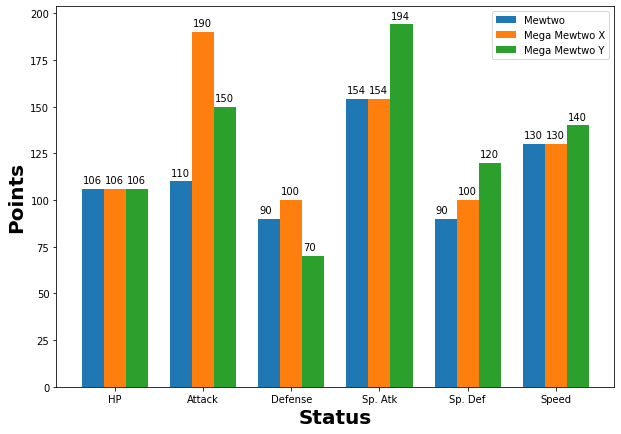

In [31]:
# set bar width
barWidth = 0.25
fig = plt.figure(figsize=(10, 7))

# Horizontal  Data Positioning
stat = np.arange(len(point))
statX = [x + barWidth for x in stat]
statY = [x + barWidth for x in statX]


# Plotting
mewt = plt.bar(stat, point, label='Mewtwo', width=barWidth)
mewtX = plt.bar(statX, pointX, label='Mega Mewtwo X', width=barWidth)
mewtY = plt.bar(statY, pointY, label='Mega Mewtwo Y', width=barWidth)

# Labeling
plt.xlabel('Status', fontweight = 'bold', fontsize = '20')
plt.ylabel('Points', fontweight = 'bold', fontsize = '20')
plt.xticks([r + barWidth for r in range(len(stat))], 
            ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'])
plt.legend()

# Function for text label for each bar
def labeling(x):

    "Attach a text label above each bar displaying its height"

    for bar in x:
        plt.annotate(bar.get_height(),xy=(bar.get_x() + 0.01, bar.get_height()+3), fontsize=10)
    return

labeling(mewt)
labeling(mewtX)
labeling(mewtY)

# Print the graph
plt.show()

From above result I can conclude:
- `Mewtwo` HP stat are same across form and is 106 points
- `Mewtwo` will have the highest attack and defense stats in `Mega Mewtwo X` form
- `Mewtwo` will have the highest Sp. attack and Sp. defense stats in `Mega Mewtwo Y` form
- Although speed point is not much differ from one and other, `Mega Mewtwo Y` has the highest speed

I will then use the result from 1st objective as my information in answering the second objective

### V.2 Second Objective
My second objective is to make a recommendation of Pokemon team consist of 6 of Pokemon to battle and capture Mewtwo

Before jump into second objective, I choose to flatten all three `Mewtwo` stat.

The reason behind my decision is because we don't know what form `Mewtwo` will take during the battle.

Maybe it can change its form as it like. So I'll just take the average points for each stat.

In [32]:
# Flatten three `Mewtwo` stats

mewtwo_df = clean_df[
    (clean_df['Pokedex_num']==150)
][['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].mean()

# put its stat into new list
mewtwo_flatten_stat = mewtwo_df.values

# Round it into 2 point behind comma
mewtwo_flatten_stat = [round(i,2) for i in mewtwo_flatten_stat]

print(mewtwo_flatten_stat)
len(mewtwo_flatten_stat)

[106.0, 150.0, 86.67, 167.33, 103.33, 133.33]


6

Average `Mewtwo` stat graph

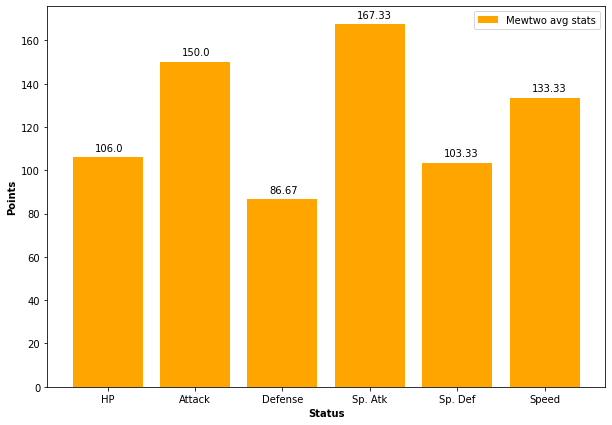

In [33]:
# set figure size
fig = plt.figure(figsize=(10, 7))

# Plotting
avg_mewstat = plt.bar(stat, mewtwo_flatten_stat, label = 'Mewtwo avg stats', color = 'Orange')

# Labeling
plt.xlabel('Status', fontweight = 'bold', fontsize = '10')
plt.ylabel('Points', fontweight = 'bold', fontsize = '10')
plt.xticks(np.arange(len(mewtwo_flatten_stat)),['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'])
plt.legend()

# Attach a text label above each bar displaying its height
for bar in avg_mewstat:
    plt.annotate(bar.get_height(),xy=(bar.get_x() + 0.25, bar.get_height()+3,), fontsize=10)

# Print the graph
plt.show()

So here we go, the average of three `mewtwo` stat is here:
- HP : 106
- Attack : 150
- Def : 86.67
- Sp. Atk : 167.33
- Sp. Def : 103.33
- Speed : 133.33

In order to make a strong Pokemon team to battle and capture `Mewtwo`, I will search the dataset a Pokemon with stats close to or higher than `Mewtwo`.

I also will utilize `Pokemon Type Chart` to determine what Pokemon type are best against `Mewtwo`

### Pokemon Type Chart
<img src="https://img.pokemondb.net/images/typechart.png"
    alt = "Pokemon Type Chart"
    style = 10px>

The full type chart here displays the strengths and weaknesses of each type.

Look down the left hand side for the attacking type, then move across to see how effective it is against each Pokémon type.

From chart above, we can see Pokemon that could deal `super-effective` damage to `Mewtwo (Psychic)` are `Bug, Ghost, & Dark` Type Pokemon.

Pokemon that could deal `super-effective` damage to `Mega Mewtwo X (Psychic & Fighting)` are `Flying, Psychic, & Fairy` Type Pokemon.

### Creating the Team!
So, my Pokemon team criteria will be any Pokemon with:
- `Non Legendary Pokemon`, because its almost impossible to catch other Legendary Pokemon first 😞😞
- `Bug, Ghost, Dark, Flying, Psychic, or Fairy` Type Pokemon
- Have stats close to or higher than average `Mewtwo` stats

First, let's filter the dataset.

In [34]:
# Set Pokemon Type Criteria
criteria = ['Bug', 'Ghost', 'Dark', 'Flying', 'Psychic', 'Fairy']

# Filter the Pokemon Type
Poke_team = clean_df.loc[
    (clean_df['Type 2'].isin(criteria)) |
    (clean_df['Type 1'].isin(criteria)) 
    #(clean_df['Legendary']==False) 
]

# Filter the Legendary status
Poke_team = Poke_team.loc[
    (Poke_team['Legendary']==False)
]

Poke_team.sort_values('Total', ascending=False, inplace=True)

# Let's see first 20 Pokemon
Poke_team.head(20)

,Pokedex_num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
306,282,GardevoirMega Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,3,False
527,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
154,142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
412,376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False
248,229,HoundoomMega Houndoom,Dark,Fire,600,75,90,90,140,90,115,2,False


From result above, we could see that the closest  Pokemon that has overall stat closes to `Mewtwo` (700 points) are `Mega Metagross`, `Mega Tyranitar`, & `Mega Salamance`.They are all Pokemon with `Mega form`.

Strongest Pokemon with `Base form` only reach 600 points in total stats.

Based on result above, I will recommend a team consist of:
- `Mega Metagross` (Metagross) -- (Steel, Psychic, high in Atk & Def)
- `Mega Tyranitar` (Tyranitar) -- (Rock, Dark, high in Atk & Def)
- `Mega Salamence` (Salamence) -- (Dragon, Flying, high in Atk & Def)
- `Mega Gyarados` (Gyarados) -- (Water, Dark, high in Atk & Sp. Def)
- `Mega Gengar` (Gengar) -- (Ghost, Poison, high in Sp. Atk & Speed)
- `Hydreigon` -- (Dark, Dragon, high in Sp. Atk & HP)

Battle a Legendary Pokemon is sure is hard, we need Pokemon with `Mega form` to balance its power.

Here is my team stats:

In [35]:
# Chosen Pokemon
team_stat = ['Metagross', 'Tyranitar', 'Salamence', 'Gyarados', 'Gengar', 'Hydreigon', 
'MetagrossMega Metagross', 'TyranitarMega Tyranitar', 'SalamenceMega Salamence', 'GyaradosMega Gyarados', 'GengarMega Gengar']

# Filter the dataframe to shows chosen Pokemon stat
# Short by their Pokedex_num then Total stats
Poke_team = Poke_team.loc[
        (Poke_team['Name'].isin(team_stat))
][['Pokedex_num','Name','Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].sort_values(by=['Pokedex_num', 'Total'])

Poke_team

,Pokedex_num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
101,94,Gengar,Ghost,Poison,500,60,65,60,130,75,110
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81
267,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71
408,373,Salamence,Dragon,Flying,600,95,135,80,110,80,100
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120
412,376,Metagross,Steel,Psychic,600,80,135,130,95,90,70
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110


Here is my team average stats:

In [36]:
# Team average stat
# Averaging their base stats and their mega form stats

criteria2 = [94, 130, 248, 373, 376, 635]

Poke_team[
    (Poke_team['Pokedex_num'].isin(criteria2))
].groupby(['Pokedex_num']).agg({'Total':'mean', 'HP':'mean', 'Attack':'mean', 'Defense':'mean', 
                                'Sp. Atk':'mean', 'Sp. Def':'mean', 'Speed':'mean'})

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Pokedex_num,,,,,,,
94,550.0,60.0,65.0,70.0,150.0,85.0,120.0
130,590.0,95.0,140.0,94.0,65.0,115.0,81.0
248,650.0,100.0,149.0,130.0,95.0,110.0,66.0
373,650.0,95.0,140.0,105.0,115.0,85.0,110.0
376,650.0,80.0,140.0,140.0,100.0,100.0,90.0
635,600.0,92.0,105.0,90.0,125.0,90.0,98.0


And here is the strategies to battle and capture `Mewtwo`

- If `Mewtwo` took its `Base form`. We can use `Tyranitar`, `Hydreigon`, or `Gengar`
- If `Mewtwo` change to `Mega Mewtwo X`, which dual type and strong in Atk. & Def. We can counter it using `Mega Metagross`, `Mega Salamence`, or `Mega Gyarados`
- If `Mewtwo` change to `Mega Mewtwo Y`, which strong in Sp. Atk & Sp. Def, We can counter it using `Mega Gyarados`, `Mega Gengar`, or `Hydreigon`

## VI. Conclusion

### VI.1 First Conclusion

### Investigate `Mewtwo`:
`Mewtwo` can be described as:
- 1st Generation Legendary Pokemon
- Psychic type Pokemon
- Has high overall stats
- Has two `Mega form`, Mega Mewtwo X & Mega Mewtwo Y
- Mega Mewtwo X is dual type `Psychic` & `Fighting` Pokemon, strong in Atk and Def stats
- Mega Mewtwo Y strong in Sp. Atk & Sp. Def
- Has Weakness mainly to `Bug, Ghost, Dark, Flying, Psychic, or Fairy` Type Pokemon

### VI.2 Second Conclusion

Recommendation of Pokemon team to battle and capture Mewtwo

Based on my analysis, the best team would be consist of :

- `Mega Metagross` (Metagross) -- (Steel, Psychic, high in Atk & Def)
- `Mega Tyranitar` (Tyranitar) -- (Rock, Dark, high in Atk & Def)
- `Mega Salamence` (Salamence) -- (Dragon, Flying, high in Atk & Def)
- `Mega Gyarados` (Gyarados) -- (Water, Dark, high in Atk & Sp. Def)
- `Mega Gengar` (Gengar) -- (Ghost, Poison, high in Sp. Atk & Speed)
- `Hydreigon` -- (Dark, Dragon, high in Sp. Atk & HP)

with the strategy of :

- If `Mewtwo` took its `Base form`. We can use `Tyranitar`, `Hydreigon`, or `Gengar`
- If `Mewtwo` change to `Mega Mewtwo X`, which dual type and strong in Atk. & Def. We can counter it using `Mega Metagross`, `Mega Salamence`, or `Mega Gyarados`
- If `Mewtwo` change to `Mega Mewtwo Y`, which strong in Sp. Atk & Sp. Def, We can counter it using `Mega Gyarados`, `Mega Gengar`, or `Hydreigon`

# Thankyou
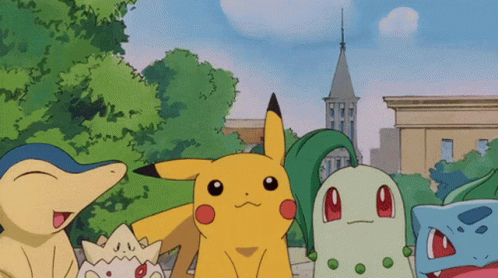
